# Customer Churn Prediction

- Problem Statement & Dataset :- https://www.kaggle.com/shrutimechlearn/churn-modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8082,8083,15774551,K?,772,Spain,Male,36,3,112029.83,1,1,1,186948.35,0
6794,6795,15694098,Jackson,575,France,Female,54,9,68332.96,1,1,1,144390.75,0
1982,1983,15756680,Phillips,667,France,Male,28,6,165798.10,1,1,0,147090.90,0
3079,3080,15774727,Monaldo,757,Germany,Female,34,1,129398.01,2,0,0,44965.44,0
337,338,15648064,Kennedy,649,France,Male,33,2,0.00,2,1,0,2010.98,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis

C:\Users\AYUSH\AppData\Local\Temp\ipykernel_10672\766436975.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

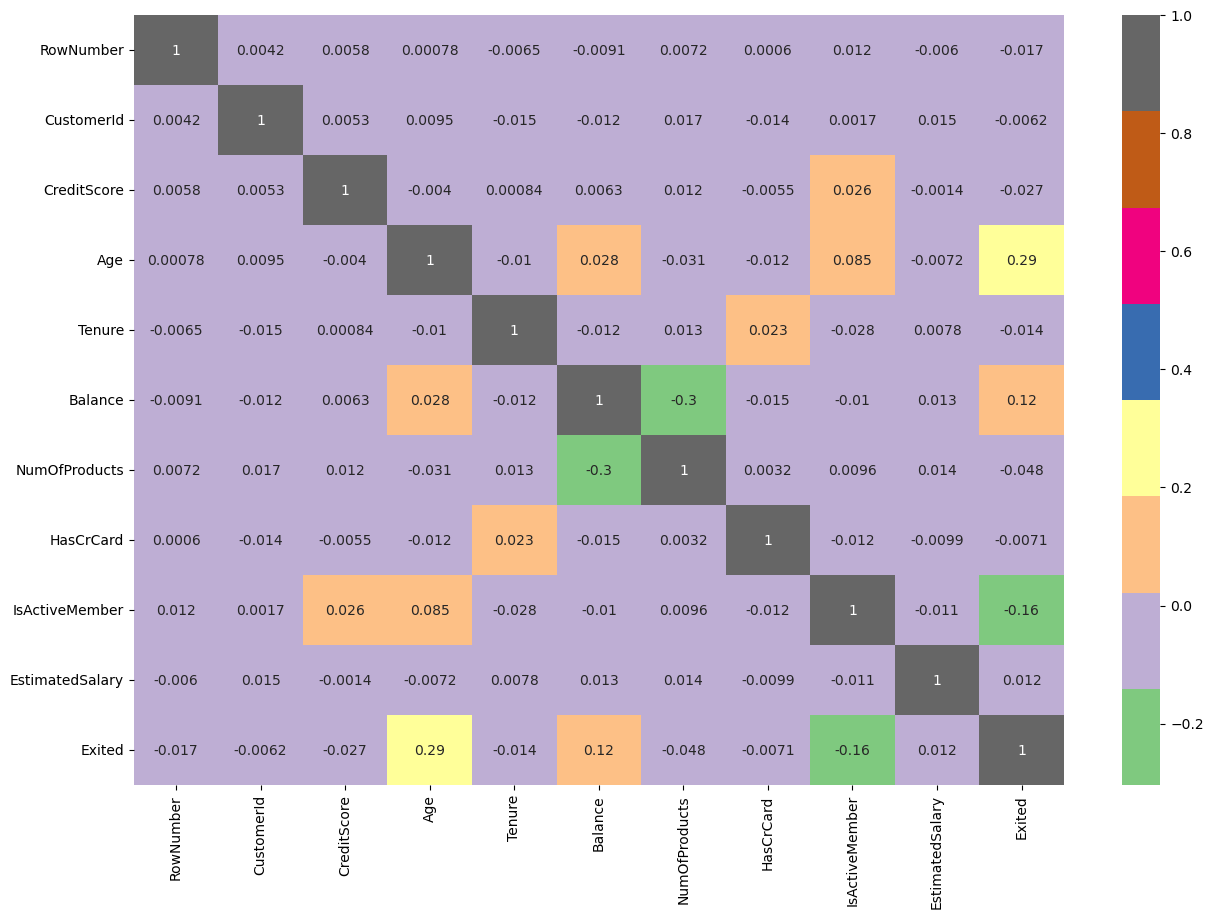

In [9]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = "Accent")

In [10]:
features = corr['Exited'].sort_values(ascending=False)[1:]

In [11]:
features.index

Index(['Age', 'Balance', 'EstimatedSalary', 'CustomerId', 'HasCrCard',
       'Tenure', 'RowNumber', 'CreditScore', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

In [12]:
features.values

array([ 0.28532304,  0.11853277,  0.01209686, -0.00624799, -0.00713777,
       -0.01400061, -0.01657137, -0.02709354, -0.04781986, -0.15612828])

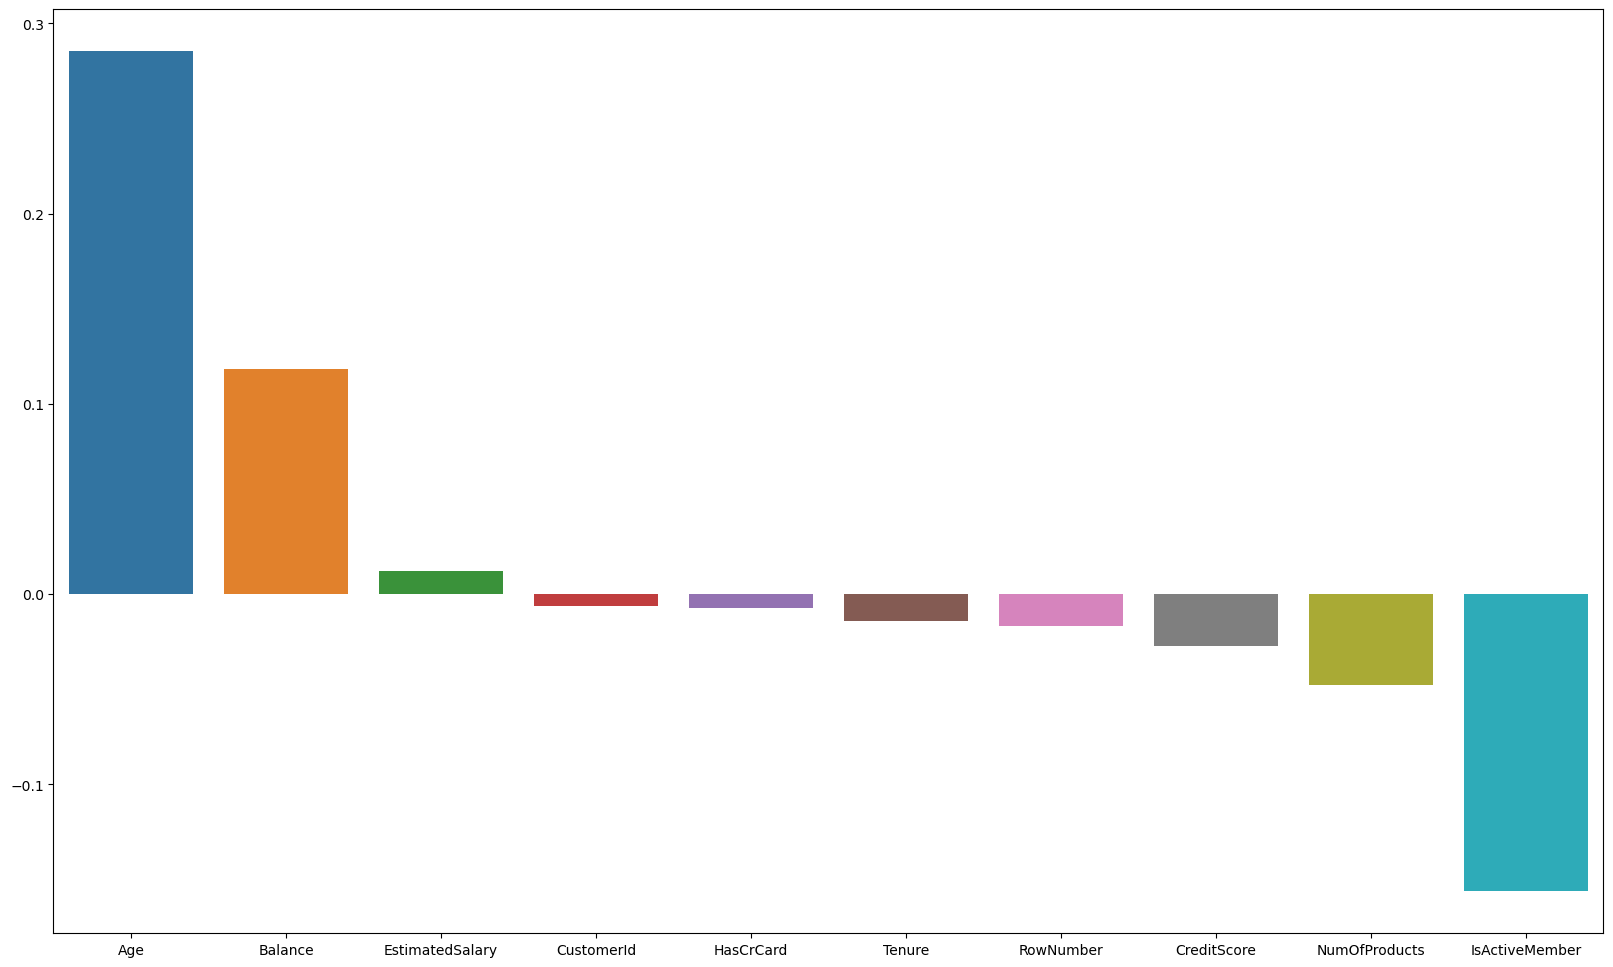

In [13]:
plt.figure(figsize=(20,12))
sns.barplot(x = features.index, y = features.values)
plt.show()

# Data Visualization

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


0    7963
1    2037
Name: Exited, dtype: int64


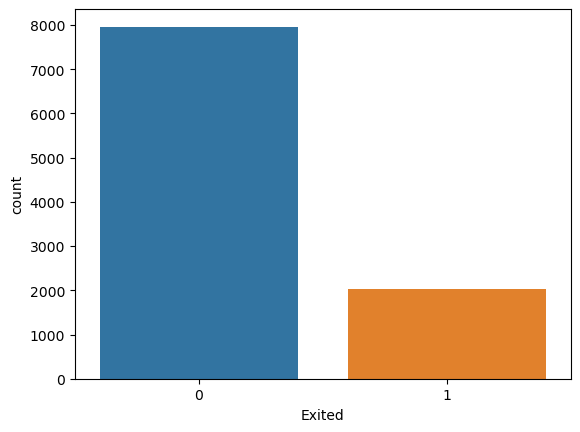

In [15]:
print(df['Exited'].value_counts())
sns.countplot(x='Exited',data = df)
plt.show()

Male      5457
Female    4543
Name: Gender, dtype: int64


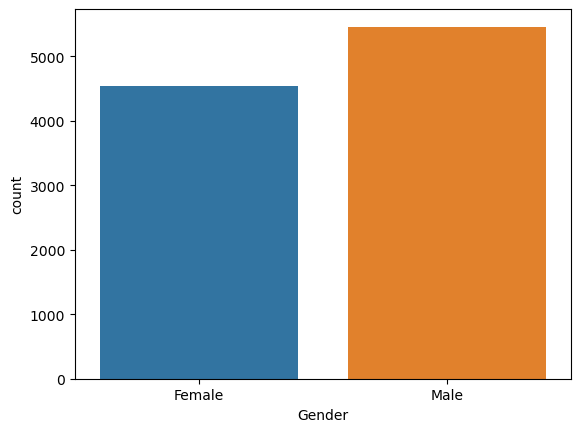

In [16]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df)
plt.show()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


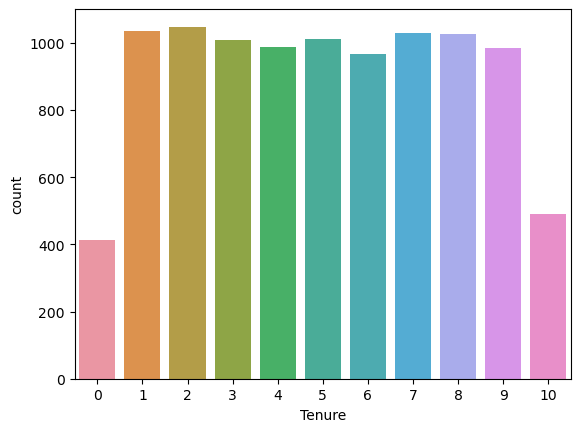

In [17]:
print(df['Tenure'].value_counts())
sns.countplot(x='Tenure',data = df)
plt.show()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


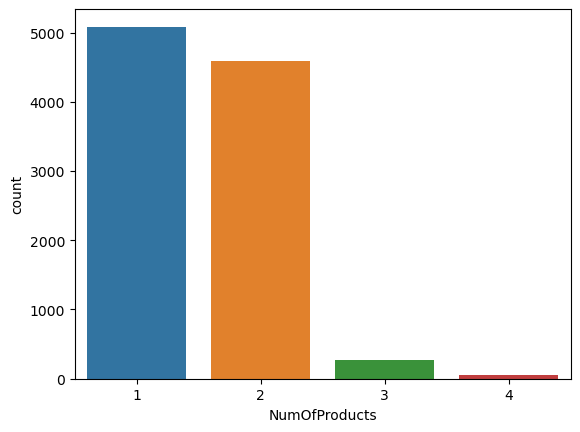

In [18]:
print(df['NumOfProducts'].value_counts())
sns.countplot(x='NumOfProducts',data = df)
plt.show()

1    7055
0    2945
Name: HasCrCard, dtype: int64


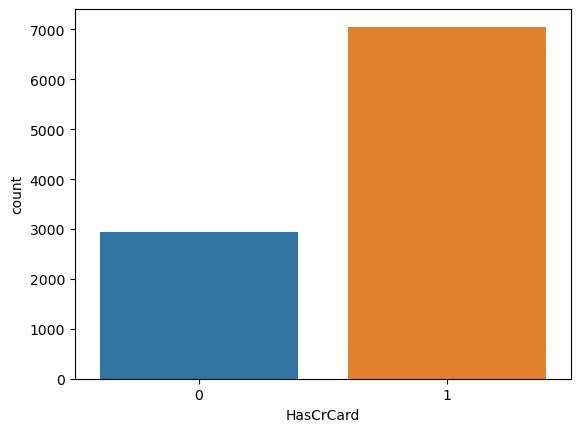

In [19]:
print(df['HasCrCard'].value_counts())
sns.countplot(x='HasCrCard',data = df)
plt.show()

# Finding Relations

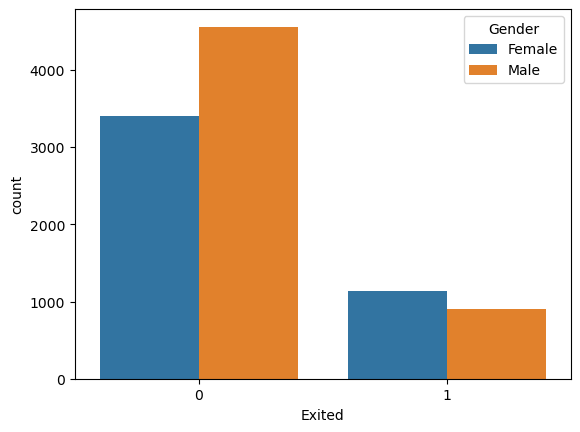

In [20]:
sns.countplot(x='Exited',data = df, hue='Gender')
plt.show()

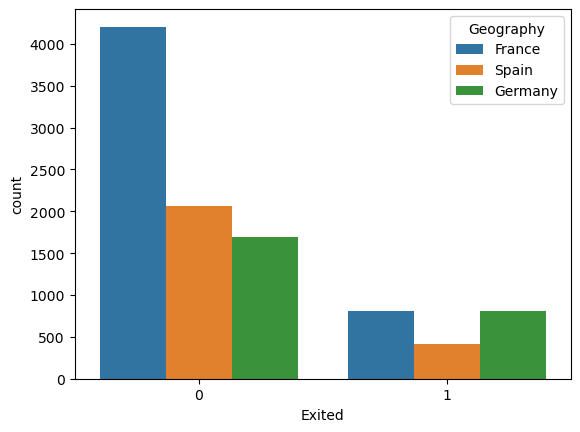

In [21]:
sns.countplot(x='Exited',data = df, hue='Geography')
plt.show()

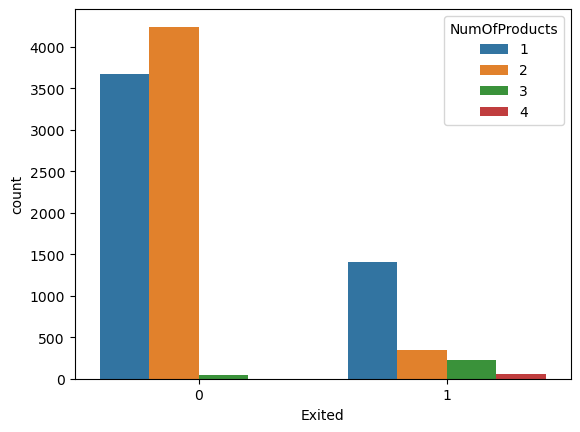

In [22]:
sns.countplot(x='Exited',data = df, hue='NumOfProducts')
plt.show()

C:\Users\AYUSH\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\AYUSH\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


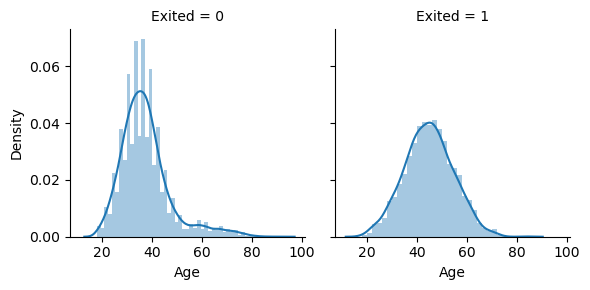

In [23]:
sns.FacetGrid(df, col = 'Exited')\
    .map(sns.distplot, "Age")
plt.show()

# Data Preprocessing

In [24]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace = True)

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df['Geography'] = df['Geography'].astype('category').cat.codes

In [27]:
df['Gender'] = np.where(df['Gender']=='Male',1,0)

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
x = df.drop(columns = ['Exited']).values
y = df['Exited'].values

In [30]:
x.shape

(10000, 10)

In [31]:
y.shape

(10000,)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

# Model Building

In [34]:
!pip install xgboost

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [36]:
from xgboost import XGBClassifier

In [37]:
basic_model = XGBClassifier()
basic_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
def evaluate_model(model):
    print("Training Accuracy : ",model.score(x_train,y_train))
    print("Testing Accuracy : ",model.score(x_test,y_test))
    
    y_pred = model.predict(x_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("F1 Score : ",f1_score(y_test,y_pred))

In [39]:
evaluate_model(basic_model)

Training Accuracy :  0.9614925373134329
Testing Accuracy :  0.8612121212121212
[[2529  128]
 [ 330  313]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2657
           1       0.71      0.49      0.58       643

    accuracy                           0.86      3300
   macro avg       0.80      0.72      0.75      3300
weighted avg       0.85      0.86      0.85      3300

F1 Score :  0.577490774907749


# Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
xgb_params = {
    'n_estimators' : [100, 200],
    'max_depth' : [4,5]
}

In [42]:
grid = GridSearchCV(XGBClassifier(), param_grid = xgb_params, scoring = "accuracy", cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [43]:
print("Best score ",grid.best_score_)

Best score  0.8532835820895522


In [44]:
print("Best parameters ",grid.best_params_)

Best parameters  {'max_depth': 4, 'n_estimators': 100}


In [45]:
model_1 = XGBClassifier(max_depth=4)
model_1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
evaluate_model(model_1)

Training Accuracy :  0.9095522388059701
Testing Accuracy :  0.866969696969697
[[2539  118]
 [ 321  322]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.73      0.50      0.59       643

    accuracy                           0.87      3300
   macro avg       0.81      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300

F1 Score :  0.5946445060018468


In [54]:
!pip install joblib

In [56]:
import joblib

model_filename = 'model_1.pkl'

with open(model_filename, 'wb') as model_file:
    joblib.dump(model_1, model_file)

print(f"Model saved as {model_filename}")



Model saved as model_1.pkl
